In [1]:
import torch
import numpy as np
import pandas as pd
import pickle
import statistics
from sklearn.metrics import classification_report, accuracy_score, f1_score, precision_score, recall_score
import matplotlib.pyplot as plt
import seaborn as sns
import significantdigits as sd
import re
import json

## Runtime

In [83]:
# FastSurfer

fuzzy_singlethread_fastsurfer = []
verrou_fastsurfer = []
default_fastsurfer = []

for iter in range(2,6):
    f = open(f"/home/inesgp/verrou_fastsurfer/slurm/fuzzy_fastsurfer_{iter}.out")
    time_per_sub = []
    for line in f: 
        if "real" in line:
            time_str = line.split('real')[-1]
            minutes, seconds = time_str.split('m')
            seconds = float(seconds.replace('s', ''))
            total_seconds = int(minutes) * 60 + seconds
            time_per_sub.append(total_seconds)
    fuzzy_singlethread_fastsurfer.append(time_per_sub)

fuzzy_singlethread_fastsurfer = np.array(fuzzy_singlethread_fastsurfer).mean(axis=1)

for iter in range(2,6):
    f = open(f"/home/inesgp/verrou_fastsurfer/slurm/ieee_fastsurfer_{iter}.out")
    time_per_sub = []
    for line in f: 
        if "real" in line:
            time_str = line.split('real')[-1]
            minutes, seconds = time_str.split('m')
            seconds = float(seconds.replace('s', ''))
            total_seconds = int(minutes) * 60 + seconds
            time_per_sub.append(total_seconds)
    default_fastsurfer.append(time_per_sub)

default_fastsurfer = np.array(default_fastsurfer).mean(axis=1)


for iter in range(2,6):
    time_per_sub = []
    for sub in range(1,6):
        f = open(f"/home/inesgp/verrou_fastsurfer/runtime/{iter}_{sub}.log")
        for line in f: 
            if "elapsed" in line:
                time_str = re.search(r'(\d+):(\d+):(\d+)', line)
                # if time_match:
                hours, minutes, seconds = map(int, time_str.groups())
                total_seconds = hours * 3600 + minutes * 60 + seconds
                time_per_sub.append(total_seconds)

    verrou_fastsurfer.append(time_per_sub)

verrou_fastsurfer = np.array(verrou_fastsurfer).mean(axis=1)


# verrou_ratio = [(v/f) for v,f in zip(verrou_fastsurfer, fuzzy_fastsurfer)]
verrou_singlethread_ratio = [(v/f) for v,f in zip(verrou_fastsurfer, fuzzy_singlethread_fastsurfer)]
# fuzzy_ratio = [(d/f) for f,d in zip(fuzzy_rr_mnist, default_mnist)]

# fastsurfer_runtime = pd.DataFrame({'Default': default_fastsurfer,'Verrou': verrou_fastsurfer, 'Fuzzy PyTorch': fuzzy_fastsurfer, 'Fuzzy PyTorch Single Threaded': fuzzy_singlethread_fastsurfer, 
#                               "Fuzzy Speed Up Factor from Verrou": verrou_ratio, "Fuzzy Single Threaded Speed Up Factor from Verrou": verrou_singlethread_ratio, })

fastsurfer_runtime = pd.DataFrame({'Default': default_fastsurfer, 'Verrou': verrou_fastsurfer, 'Fuzzy PyTorch Single Threaded': fuzzy_singlethread_fastsurfer, 
                              "Fuzzy Single Threaded Speed Up Factor from Verrou": verrou_singlethread_ratio, })

fastsurfer_runtime = fastsurfer_runtime.rename(index={0: 'MCA Iteration 1', 1: 'MCA Iteration 2', 2: 'MCA Iteration 3', 3: 'MCA Iteration 4', })

fastsurfer_runtime

,Default,Verrou,Fuzzy PyTorch Single Threaded,Fuzzy Single Threaded Speed Up Factor from Verrou
MCA Iteration 1,8520.5546,1758322.6,44907.5632,39.154264
MCA Iteration 2,8739.0932,1757598.2,44996.0380,39.061177
MCA Iteration 3,15595.7988,1758237.8,50443.6954,34.855452
MCA Iteration 4,5655.2488,1758062.2,24666.6974,71.272703


In [31]:
# MNIST

fuzzy_mnist = []
fuzzy_singlethread_mnist = []
verrou_mnist = []
default_mnist = []

for num in range(1,6):
    f = open(f"/home/inesgp/mnist/slurm/fuzzy_mnist_test_{num}.out")
    for line in f: 
        if "real" in line:
            time_str = line.split('real')[-1]
            minutes, seconds = time_str.split('m')
            seconds = float(seconds.replace('s', ''))
            total_seconds = int(minutes) * 60 + seconds
            fuzzy_mnist.append(total_seconds)

    f = open(f"/home/inesgp/mnist/slurm/fuzzy_mnist_test_singlethread_{num}.out")
    for line in f: 
        if "real" in line:
            time_str = line.split('real')[-1]
            minutes, seconds = time_str.split('m')
            seconds = float(seconds.replace('s', ''))
            total_seconds = int(minutes) * 60 + seconds
            fuzzy_singlethread_mnist.append(total_seconds)

    f = open(f"/home/inesgp/mnist/slurm/verrou_mnist_test_{num}.out")
    for line in f: 
        if "real" in line:
            time_str = line.split('real')[-1]
            minutes, seconds = time_str.split('m')
            seconds = float(seconds.replace('s', ''))
            total_seconds = int(minutes) * 60 + seconds
            verrou_mnist.append(total_seconds)

    f = open(f"/home/inesgp/mnist/slurm/default_mnist_test_{num}.out")
    for line in f: 
        if "real" in line:
            time_str = line.split('real')[-1]
            minutes, seconds = time_str.split('m')
            seconds = float(seconds.replace('s', ''))
            total_seconds = int(minutes) * 60 + seconds
            default_mnist.append(total_seconds)

verrou_ratio = [(v/f) for v,f in zip(verrou_mnist, fuzzy_mnist)]
verrou_singlethread_ratio = [(v/f) for v,f in zip(verrou_mnist, fuzzy_singlethread_mnist)]
# fuzzy_ratio = [(d/f) for f,d in zip(fuzzy_rr_mnist, default_mnist)]

mnist_runtime = pd.DataFrame({'Default': default_mnist,'Verrou': verrou_mnist, 'Fuzzy PyTorch': fuzzy_mnist, 'Fuzzy PyTorch Single Threaded': fuzzy_singlethread_mnist, 
                              "Fuzzy Speed Up Factor from Verrou": verrou_ratio, "Fuzzy Single Threaded Speed Up Factor from Verrou": verrou_singlethread_ratio, })
mnist_runtime = mnist_runtime.rename(index={0: 'MCA Iteration 1', 1: 'MCA Iteration 2', 2: 'MCA Iteration 3', 3: 'MCA Iteration 4', 4: 'MCA Iteration 5'})

# print('Average Speed Up Factor: ',mnist_runtime['Speed Up Factor'].mean())
mnist_runtime

,Default,Verrou,Fuzzy PyTorch,Fuzzy PyTorch Single Threaded,Fuzzy Speed Up Factor from Verrou,Fuzzy Single Threaded Speed Up Factor from Verrou
MCA Iteration 1,14.004,4279.745,1287.422,198.860,3.324275,21.521397
MCA Iteration 2,14.016,4284.875,1233.211,196.761,3.474568,21.777054
MCA Iteration 3,14.013,4273.761,1277.954,200.517,3.344221,21.313709
MCA Iteration 4,14.008,4286.959,1253.932,199.072,3.418813,21.534716
MCA Iteration 5,13.999,4332.891,1273.338,199.142,3.402782,21.757796


## MNIST Variability

**TO DO**
* Run 5 more subjects for 
    * fuzzy singlethread RUNNING
    * verrou 
    * default
* Fix fuzzy multithread?

### Metric Analysis

In [24]:
def compile_results(dir_name, ):
    pred = {}
    target = {} 
    output = {}
    loss = {}
    for num in range(1,6):
    
        res = pickle.load(open(f'{dir_name}/test_metrics_{num}.pkl', 'rb'))
        # res = pickle.load(open('mnist_results_full/mnist_results_1.pkl', 'rb'))
    
        tmp_pred = torch.tensor([])
        tmp_target = torch.tensor([])
        tmp_output = torch.tensor([])
        tmp_loss = []
        
        for i in res.keys():
            for k in res[i]:
                # print(k)
                if i == 'pred': tmp_pred = torch.cat((tmp_pred, k))
                elif i == 'target': tmp_target = torch.cat((tmp_target, k))
                elif i == 'output': tmp_output = torch.cat((tmp_output, k))
                elif i == 'loss': tmp_loss.append(k)
    
        # print(tmp_output.shape)
        pred[num] = tmp_pred.numpy() 
        target[num] = tmp_target.numpy() 
        output[num] = tmp_output.numpy() 
        loss[num] = tmp_loss

    return pred, target, output, loss

def metric_unstability(pred, target, loss):

    #gotten from slurm output
    #TODO save to file
    # avg_loss = [0.025298748701810838, 0.025298750564455987, 0.025298746135830878, 0.02529873021543026, 0.025298738285899163, 
    #         0.025298739501833915, 0.02529874346256256, 0.02529875337779522, 0.025298740258812905, 0.0252987517952919]

    acc = []
    macro_f1 = []
    weighted_f1 = []
    macro_precision = []
    weighted_precision = []
    macro_recall = []
    weighted_recall = []
    
    for i, j in zip(target, pred):
        acc.append(accuracy_score(target[i], pred[j]))
        macro_f1.append(f1_score(target[i], pred[j], average='macro'))
        weighted_f1.append(f1_score(target[i], pred[j], average='weighted'))
        macro_precision.append(precision_score(target[i], pred[j], average='macro'))
        weighted_precision.append(precision_score(target[i], pred[j], average='weighted'))
        macro_recall.append(recall_score(target[i], pred[j], average='macro'))
        weighted_recall.append(recall_score(target[i], pred[j], average='weighted'))
    
    # results = {'Accuracy': acc, 'Macro F1': macro_f1, 'Macro Precision': macro_precision, 'Macro Recall': macro_recall, 
    #            'Average Loss': avg_loss}
    
    results = {'Accuracy': acc, 'Macro F1': macro_f1, 'Weighted F1': weighted_f1, 'Macro Precision': macro_precision, 
               'Weighted Precision': weighted_precision, 'Macro Recall': macro_recall, 'Weighted Recall': weighted_recall, 
               'Average Loss per Batch': loss}
    metrics = {}
    for m in results:
        if 'Average Loss per Batch' == m:
            metrics[m] = {'Mean': [np.mean(np.mean(np.array(list(loss.values())),axis=0))], 
                          'Standard Deviation': [np.mean(np.std(np.array(list(loss.values())),axis=0))],
                          'Significant Digits': [ np.mean( sd.significant_digits(np.array(list(loss.values())), reference=np.mean(np.array(list(loss.values())), axis=0),  basis=10) ) ]  }
        else: metrics[m] = {'Mean': [statistics.mean(results[m])], 'Standard Deviation': [statistics.stdev(results[m])], 'Significant Digits': [sd.significant_digits(results[m], reference=np.mean(results[m]),  basis=10)] }



    df = pd.concat( [pd.DataFrame(metrics['Accuracy']), pd.DataFrame(metrics['Macro F1']), pd.DataFrame(metrics['Weighted F1']),
                pd.DataFrame(metrics['Macro Precision']), pd.DataFrame(metrics['Weighted Precision']),
                pd.DataFrame(metrics['Macro Recall']), pd.DataFrame(metrics['Weighted Recall']), 
                     pd.DataFrame(metrics['Average Loss per Batch'])] )
    
    df.index = ['Accuracy', 'Macro F1', 'Weighted F1', 'Macro Precision', 'Weighted Precision', 'Macro Recall', 'Weighted Recall',
                'Average Loss per Batch'] 
    
    # df.loc[df.index != "Average Loss per Batch", "Mean"] *= 100

    
    return df


In [25]:
default_pred, default_target, default_output, default_loss = compile_results('/home/inesgp/mnist/default', )
fuzzy_pred, fuzzy_target, fuzzy_output, fuzzy_loss = compile_results('/home/inesgp/mnist/fuzzy', )
fuzzy_singlethread_pred, fuzzy_singlethread_target, fuzzy_singlethread_output, fuzzy_singlethread_loss = compile_results('/home/inesgp/mnist/fuzzy_singlethread', )
verrou_pred, verrou_target, verrou_output, verrou_loss = compile_results('/home/inesgp/mnist/verrou', )


fuzzy_df = metric_unstability(fuzzy_pred, fuzzy_target, fuzzy_loss)
fuzzy_singlethread_df = metric_unstability(fuzzy_singlethread_pred, fuzzy_singlethread_target, fuzzy_singlethread_loss)
verrou_df = metric_unstability(verrou_pred, verrou_target, verrou_loss)
default_df = metric_unstability(default_pred, default_target, default_loss)

In [28]:
fuzzy_df

,Mean,Standard Deviation,Significant Digits
Accuracy,0.991400,0.000000,14.902892
Macro F1,0.991323,0.000000,14.902892
Weighted F1,0.991397,0.000000,14.902892
Macro Precision,0.991361,0.000000,14.902892
Weighted Precision,0.991408,0.000000,14.902892
Macro Recall,0.991299,0.000000,14.902892
Weighted Recall,0.991400,0.000000,14.902892
Average Loss per Batch,166.550473,0.000016,6.239514


In [113]:
fuzzy_singlethread_df

,Mean,Standard Deviation,Significant Digits
Accuracy,0.991400,0.000000e+00,14.902892
Macro F1,0.991323,0.000000e+00,14.902892
Weighted F1,0.991397,0.000000e+00,14.902892
Macro Precision,0.991361,0.000000e+00,14.902892
Weighted Precision,0.991408,0.000000e+00,14.902892
Macro Recall,0.991299,0.000000e+00,14.902892
Weighted Recall,0.991400,0.000000e+00,14.902892
Average Loss per Batch,0.026059,1.292864e-08,5.341639


In [26]:
verrou_df

,Mean,Standard Deviation,Significant Digits
Accuracy,0.991400,0.000000e+00,14.902892
Macro F1,0.991323,0.000000e+00,14.902892
Weighted F1,0.991397,0.000000e+00,14.902892
Macro Precision,0.991361,0.000000e+00,14.902892
Weighted Precision,0.991408,0.000000e+00,14.902892
Macro Recall,0.991299,0.000000e+00,14.902892
Weighted Recall,0.991400,0.000000e+00,14.902892
Average Loss per Batch,0.026059,5.012632e-09,5.760107


In [27]:
default_df

,Mean,Standard Deviation,Significant Digits
Accuracy,0.991400,0.000000e+00,14.902892
Macro F1,0.991323,0.000000e+00,14.902892
Weighted F1,0.991397,0.000000e+00,14.902892
Macro Precision,0.991361,0.000000e+00,14.902892
Weighted Precision,0.991408,0.000000e+00,14.902892
Macro Recall,0.991299,0.000000e+00,14.902892
Weighted Recall,0.991400,0.000000e+00,14.902892
Average Loss per Batch,0.026059,3.469447e-19,14.902892


/tmp/ipykernel_162078/1579368762.py:7: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels([item for item in [''] + list(fuzzy_df.index)], rotation=30)


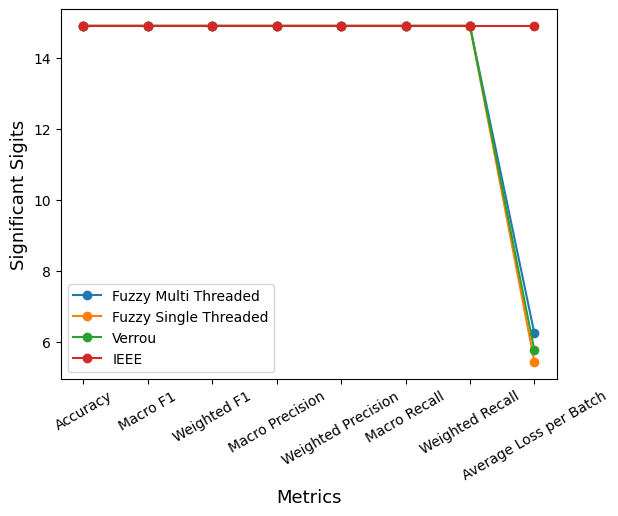

In [30]:
fig, ax = plt.subplots()

ax.plot(np.arange(len(fuzzy_df['Mean'])), fuzzy_df['Significant Digits'],  marker='o', label='Fuzzy Multi Threaded')
ax.plot(np.arange(len(fuzzy_singlethread_df['Mean'])), fuzzy_singlethread_df['Significant Digits'],  marker='o', label='Fuzzy Single Threaded')
ax.plot(np.arange(len(verrou_df['Mean'])), verrou_df['Significant Digits'],  marker='o', label='Verrou')
ax.plot(np.arange(len(default_df['Mean'])), default_df['Significant Digits'],  marker='o', label='IEEE')
ax.set_xticklabels([item for item in [''] + list(fuzzy_df.index)], rotation=30)
ax.set_xlabel('Metrics', fontsize=13), ax.set_ylabel('Significant Sigits', fontsize=13)
ax.legend()
plt.show();

### Embeddings

In [11]:
embed_conv1 = []
embed_conv2 = []
embed_pool = []
embed_fc1 = []
embed_fc2 = []
for i in range(1,6):
    embed_conv1.append( pickle.load(open(f"/home/inesgp/mnist/embeddings/fuzzy_singlethread/conv1_{i}.pkl", 'rb')) )
    embed_conv2.append( pickle.load(open(f"/home/inesgp/mnist/embeddings/fuzzy_singlethread/conv2_{i}.pkl", 'rb')) )
    embed_pool.append( pickle.load(open(f"/home/inesgp/mnist/embeddings/fuzzy_singlethread/pool_{i}.pkl", 'rb')) )
    embed_fc1.append( pickle.load(open(f"/home/inesgp/mnist/embeddings/fuzzy_singlethread/fc1_{i}.pkl", 'rb')) )
    embed_fc2.append( pickle.load(open(f"/home/inesgp/mnist/embeddings/fuzzy_singlethread/fc2_{i}.pkl", 'rb')) )

embed_conv1 = torch.stack(embed_conv1)
embed_conv2 = torch.stack(embed_conv2)
embed_pool = torch.stack(embed_pool)
embed_fc1 = torch.stack(embed_fc1)
embed_fc2 = torch.stack(embed_fc2)


#### Single Data Sample

/home/inesgp/.local/lib/python3.11/site-packages/significantdigits/_significantdigits.py:257: RuntimeWarning: invalid value encountered in divide
  return operator(x, y_reshaped)
/home/inesgp/.local/lib/python3.11/site-packages/significantdigits/_significantdigits.py:257: RuntimeWarning: invalid value encountered in divide
  return operator(x, y_reshaped)
/home/inesgp/.local/lib/python3.11/site-packages/significantdigits/_significantdigits.py:257: RuntimeWarning: invalid value encountered in divide
  return operator(x, y_reshaped)
/home/inesgp/.local/lib/python3.11/site-packages/significantdigits/_significantdigits.py:257: RuntimeWarning: invalid value encountered in divide
  return operator(x, y_reshaped)
/home/inesgp/.local/lib/python3.11/site-packages/significantdigits/_significantdigits.py:257: RuntimeWarning: invalid value encountered in divide
  return operator(x, y_reshaped)


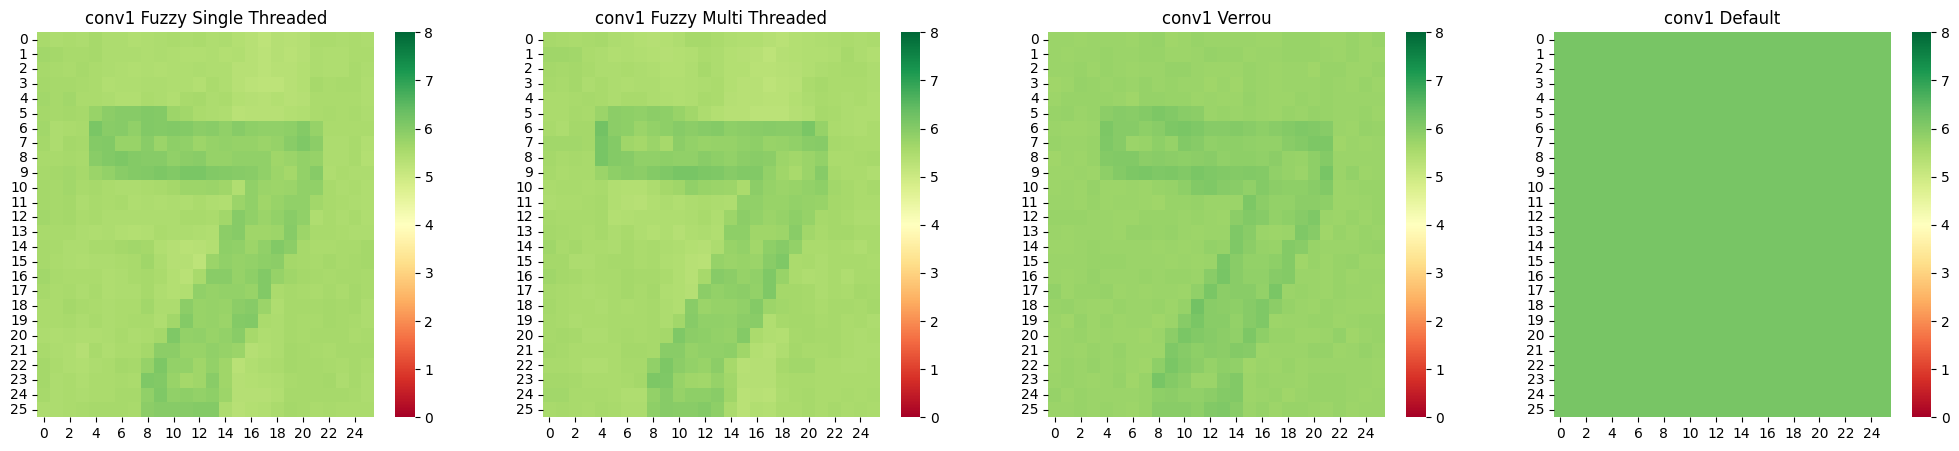

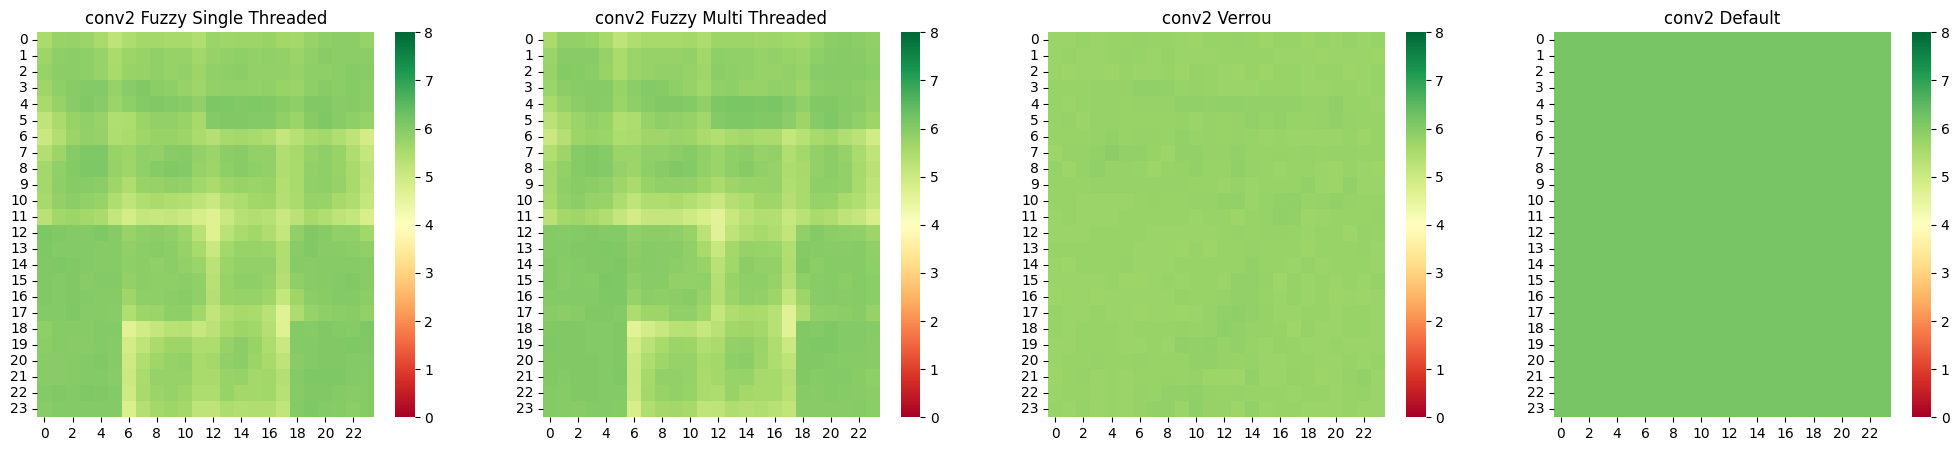

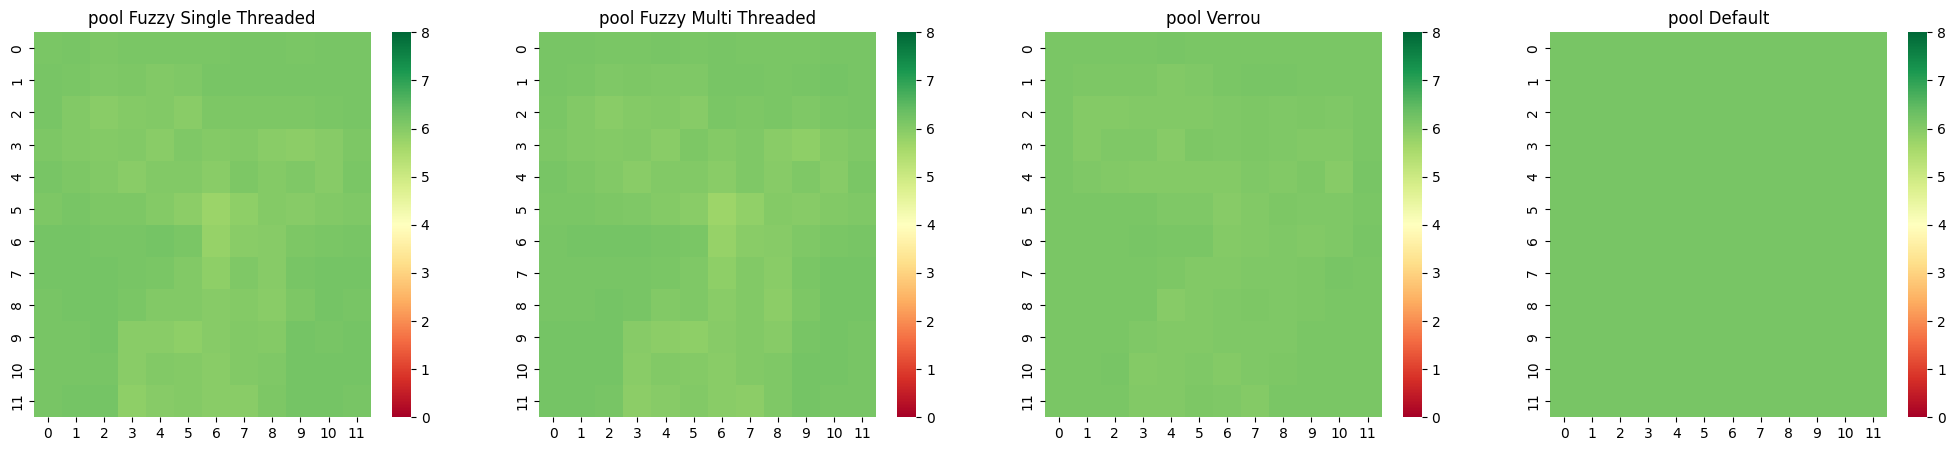

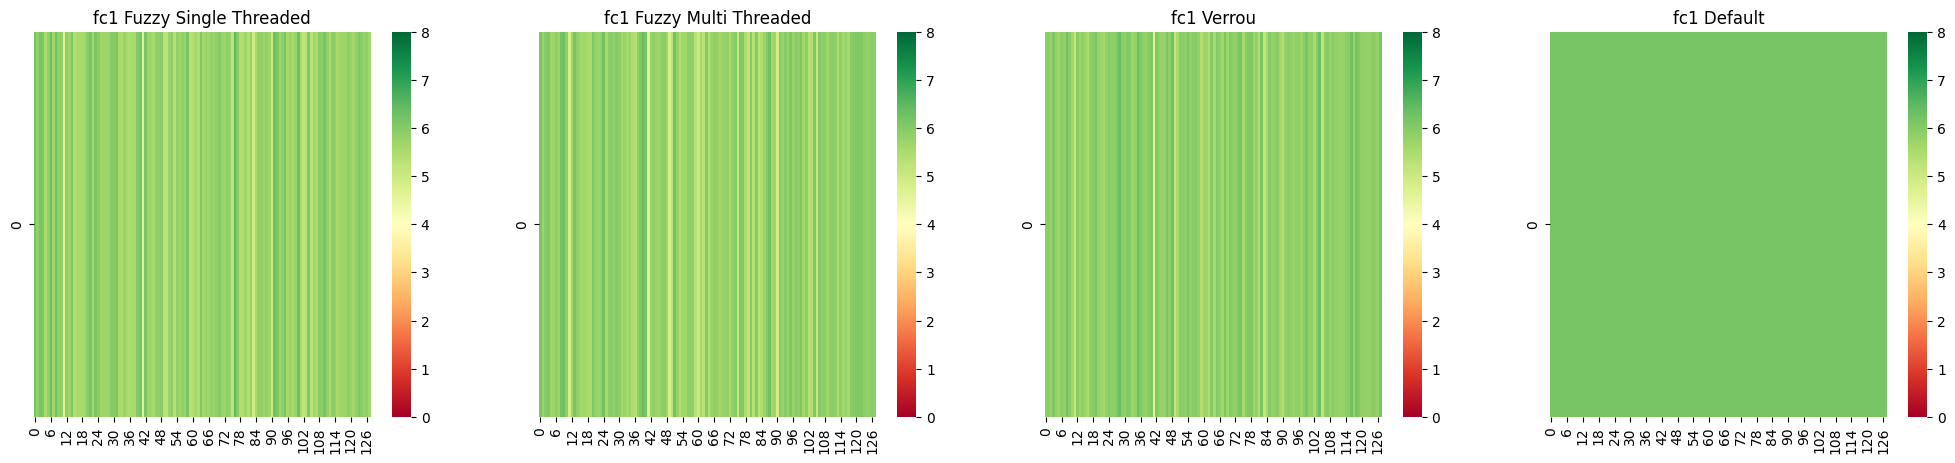

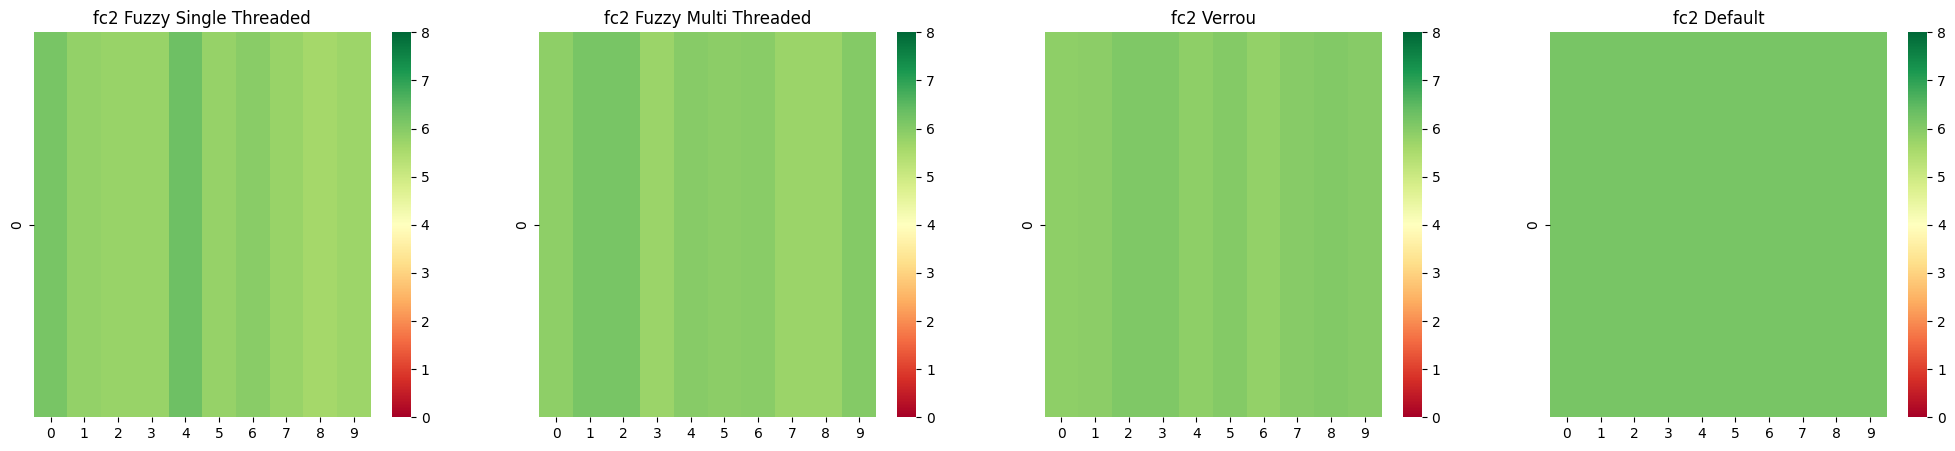

In [49]:

for layer in ['conv1', 'conv2', 'pool', 'fc1', 'fc2']:
# for layer in ['conv1', 'conv2', 'fc1', 'fc2']:
# for layer in ['conv1', ]:
# for layer in ['fc1', 'fc2']:
    embed_fuzzy_singlethread = []
    embed_fuzzy_multithread = []
    embed_verrou = []
    embed_default = []
    for i in range(1,6):
        embed_fuzzy_singlethread.append( pickle.load(open(f"/home/inesgp/mnist/embeddings/fuzzy_singlethread/{layer}_{i}.pkl", 'rb')) )
        embed_fuzzy_multithread.append( pickle.load(open(f"/home/inesgp/mnist/embeddings/fuzzy_multi/{layer}_{i}.pkl", 'rb')) )
        embed_default.append( pickle.load(open(f"/home/inesgp/mnist/embeddings/default/{layer}_{i}.pkl", 'rb')) )
        embed_verrou.append( pickle.load(open(f"/home/inesgp/mnist/embeddings/verrou/{layer}_{i}.pkl", 'rb')) )
        # embed_verrou.append( pickle.load(open(f"/home/inesgp/mnist/embeddings/verrou/mnist_embed_{i}.pkl", 'rb'))[layer][0][layer] )
    embed_fuzzy_singlethread = torch.stack(embed_fuzzy_singlethread)
    embed_fuzzy_multithread = torch.stack(embed_fuzzy_multithread)
    embed_default = torch.stack(embed_default)
    embed_verrou = torch.stack(embed_verrou)

    fig, axes = plt.subplots(1,4, figsize=(25,5))

    if 'fc' in layer: 
        #fuzzy single threaded
        layer_sig = sd.significant_digits(embed_fuzzy_singlethread.type(dtype=torch.float32), reference=torch.mean(embed_fuzzy_singlethread, dim=0, dtype=torch.float32),  basis=10)
        sns.heatmap(np.expand_dims(layer_sig[0], axis=0), ax=axes[0], cmap='RdYlGn', vmin=0, vmax=8)
        #fuzzy multithreaded
        layer_sig = sd.significant_digits(embed_fuzzy_multithread.type(dtype=torch.float32), reference=torch.mean(embed_fuzzy_multithread, dim=0, dtype=torch.float32),  basis=10)
        sns.heatmap(np.expand_dims(layer_sig[0], axis=0), ax=axes[1], cmap='RdYlGn', vmin=0, vmax=8)
        #verrou
        layer_sig = sd.significant_digits(embed_verrou.type(dtype=torch.float32), reference=torch.mean(embed_verrou, dim=0, dtype=torch.float32),  basis=10)
        sns.heatmap(np.expand_dims(layer_sig[0], axis=0), ax=axes[2], cmap='RdYlGn', vmin=0, vmax=8)
        #IEEE
        layer_sig = sd.significant_digits(embed_default.type(dtype=torch.float32), reference=torch.mean(embed_default, dim=0, dtype=torch.float32),  basis=10)
        sns.heatmap(np.expand_dims(layer_sig[0], axis=0), ax=axes[3], cmap='RdYlGn', vmin=0, vmax=8)


    else:
        #fuzzy single threaded
        layer_sig = sd.significant_digits(embed_fuzzy_singlethread.type(dtype=torch.float32), reference=torch.mean(embed_fuzzy_singlethread, dim=0, dtype=torch.float32),  basis=10)[0]
        sns.heatmap(np.mean(layer_sig, axis=0, dtype=np.float32), ax=axes[0], cmap='RdYlGn', vmin=0, vmax=8)
        #fuzzy multi threaded
        layer_sig = sd.significant_digits(embed_fuzzy_multithread.type(dtype=torch.float32), reference=torch.mean(embed_fuzzy_multithread, dim=0, dtype=torch.float32),  basis=10)[0]
        sns.heatmap(np.mean(layer_sig, axis=0, dtype=np.float32), ax=axes[1], cmap='RdYlGn', vmin=0, vmax=8)
        #verrou
        layer_sig = sd.significant_digits(embed_verrou.type(dtype=torch.float32), reference=torch.mean(embed_verrou, dim=0, dtype=torch.float32),  basis=10)[0]
        sns.heatmap(np.mean(layer_sig, axis=0, dtype=np.float32), ax=axes[2], cmap='RdYlGn', vmin=0, vmax=8)
        #IEEE
        layer_sig = sd.significant_digits(embed_default.type(dtype=torch.float32), reference=torch.mean(embed_default, dim=0, dtype=torch.float32),  basis=10)[0]
        sns.heatmap(np.mean(layer_sig, axis=0, dtype=np.float32), ax=axes[3], cmap='RdYlGn', vmin=0, vmax=8)

    axes[0].set_title(f"{layer} Fuzzy Single Threaded")
    axes[1].set_title(f"{layer} Fuzzy Multi Threaded")
    axes[2].set_title(f"{layer} Verrou")
    axes[3].set_title(f"{layer} Default")
    # break

plt.show()

**Fuzzy Single Threaded with Stdev**

/home/inesgp/.local/lib/python3.11/site-packages/significantdigits/_significantdigits.py:257: RuntimeWarning: invalid value encountered in divide
  return operator(x, y_reshaped)


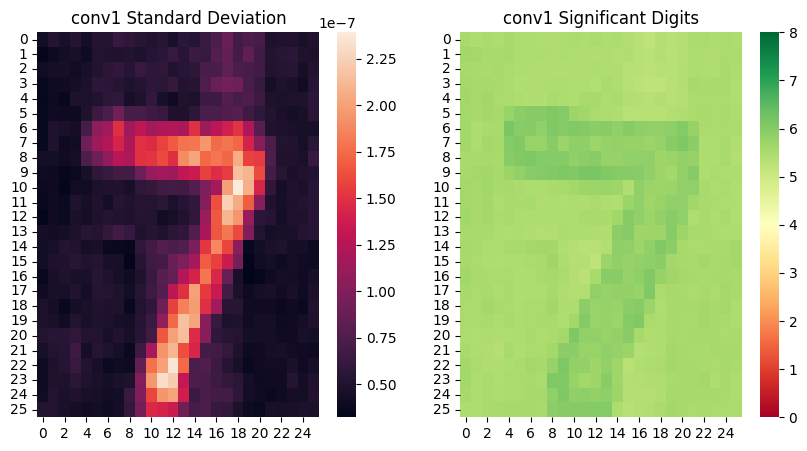

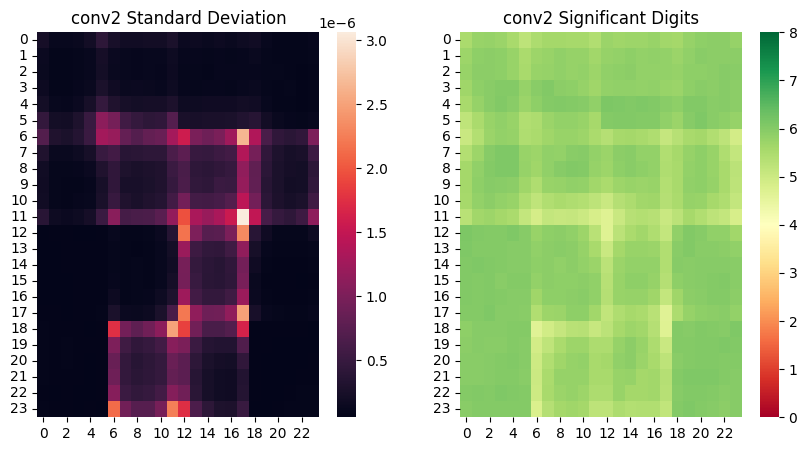

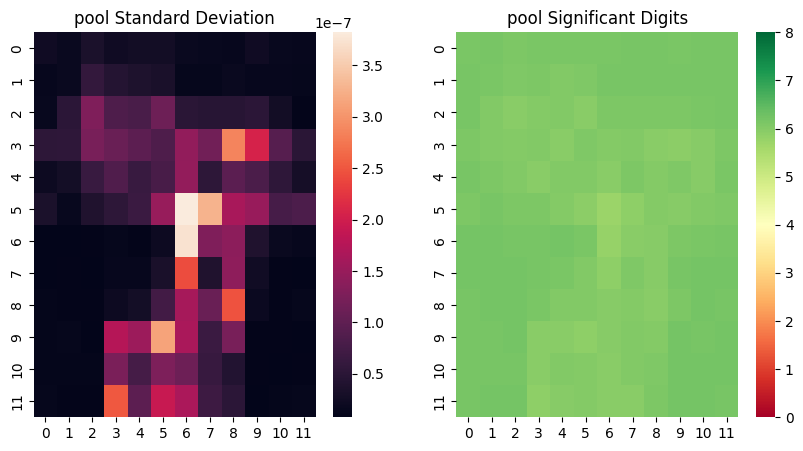

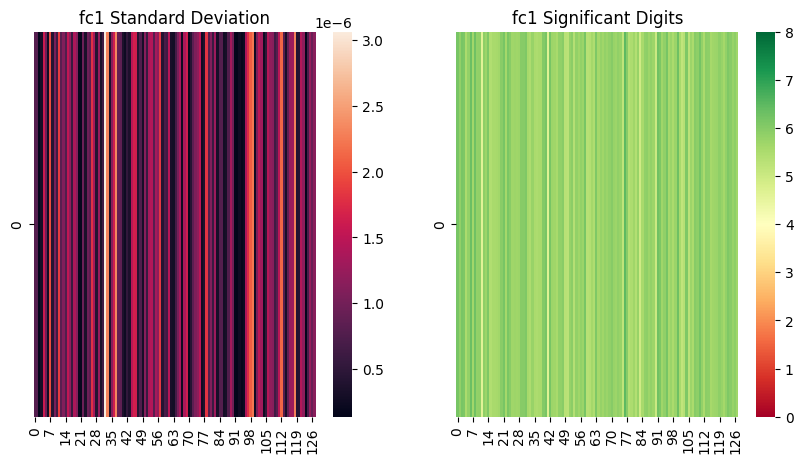

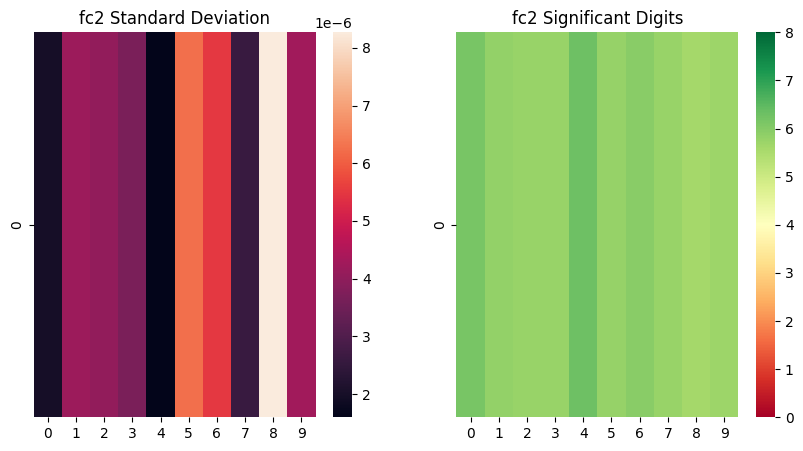

In [41]:

for layer in ['conv1', 'conv2', 'pool', 'fc1', 'fc2']:
# for layer in ['fc1', 'fc2']:
    embed = []
    for i in range(1,6):
        embed.append( pickle.load(open(f"/home/inesgp/mnist/embeddings/fuzzy_singlethread/{layer}_{i}.pkl", 'rb')) )
    embed = torch.stack(embed)

    fig, axes = plt.subplots(1,2, figsize=(10,5))

    if 'fc' in layer: 
        layer_std = torch.std(embed, dim=0)
        sns.heatmap(layer_std[0].unsqueeze(0), ax=axes[0],)

        layer_sig = sd.significant_digits(embed.type(dtype=torch.float32), reference=torch.mean(embed, dim=0, dtype=torch.float32),  basis=10)
        sns.heatmap(np.expand_dims(layer_sig[0], axis=0), ax=axes[1], cmap='RdYlGn', vmin=0, vmax=8)

    else:
        # conv1_std = torch.mean(torch.std(embed, dim=0), dim=0, dtype=torch.float32)
        layer_std = torch.std(embed, dim=0)[0]
        sns.heatmap(torch.mean(layer_std, dim=0, dtype=torch.float32), ax=axes[0],)
        
        # conv1_sig = np.mean(sd.significant_digits(embed.type(dtype=torch.float32), reference=torch.mean(embed, dim=0, dtype=torch.float32),  basis=10), axis=0)
        layer_sig = sd.significant_digits(embed.type(dtype=torch.float32), reference=torch.mean(embed, dim=0, dtype=torch.float32),  basis=10)[0]
        sns.heatmap(np.mean(layer_sig, axis=0, dtype=np.float32), ax=axes[1], cmap='RdYlGn', vmin=0, vmax=8)

    axes[0].set_title(f"{layer} Standard Deviation")
    axes[1].set_title(f"{layer} Significant Digits")
    

plt.show()

#### Averaged Across Data Samples

/home/inesgp/.local/lib/python3.11/site-packages/significantdigits/_significantdigits.py:257: RuntimeWarning: invalid value encountered in divide
  return operator(x, y_reshaped)
/home/inesgp/.local/lib/python3.11/site-packages/significantdigits/_significantdigits.py:257: RuntimeWarning: invalid value encountered in divide
  return operator(x, y_reshaped)
/home/inesgp/.local/lib/python3.11/site-packages/significantdigits/_significantdigits.py:257: RuntimeWarning: invalid value encountered in divide
  return operator(x, y_reshaped)
/home/inesgp/.local/lib/python3.11/site-packages/significantdigits/_significantdigits.py:257: RuntimeWarning: invalid value encountered in divide
  return operator(x, y_reshaped)
/home/inesgp/.local/lib/python3.11/site-packages/significantdigits/_significantdigits.py:257: RuntimeWarning: invalid value encountered in divide
  return operator(x, y_reshaped)


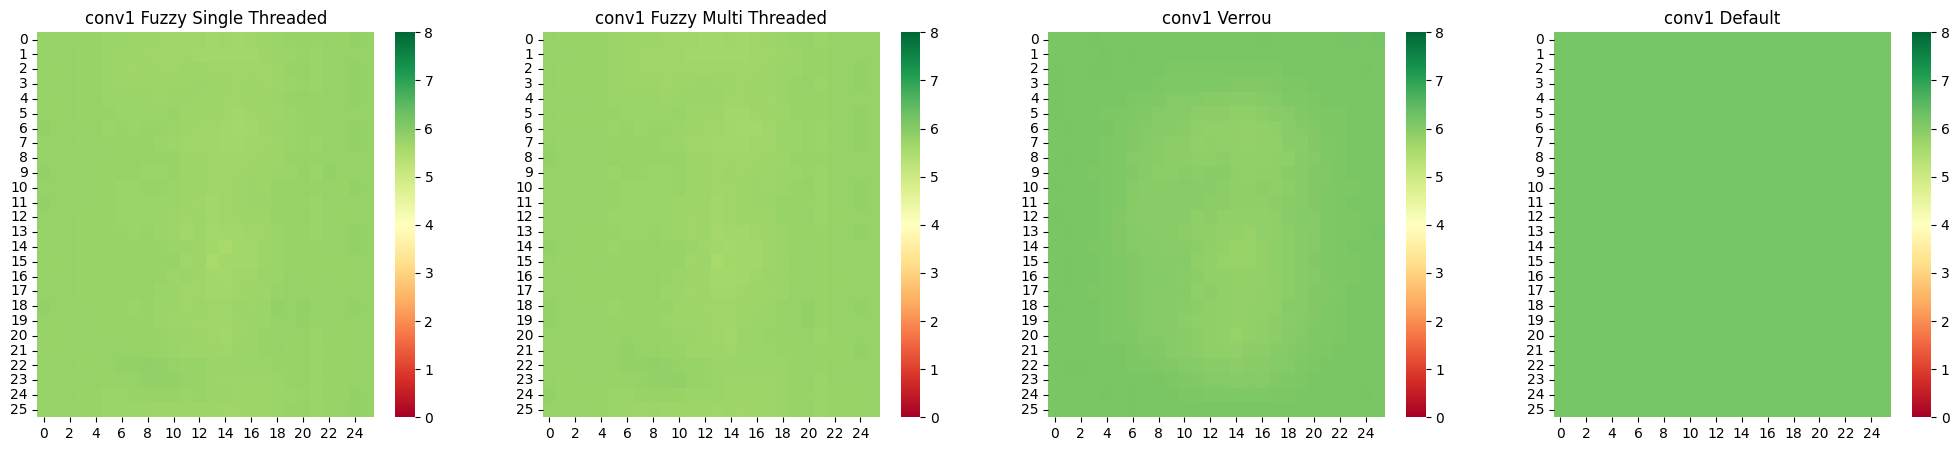

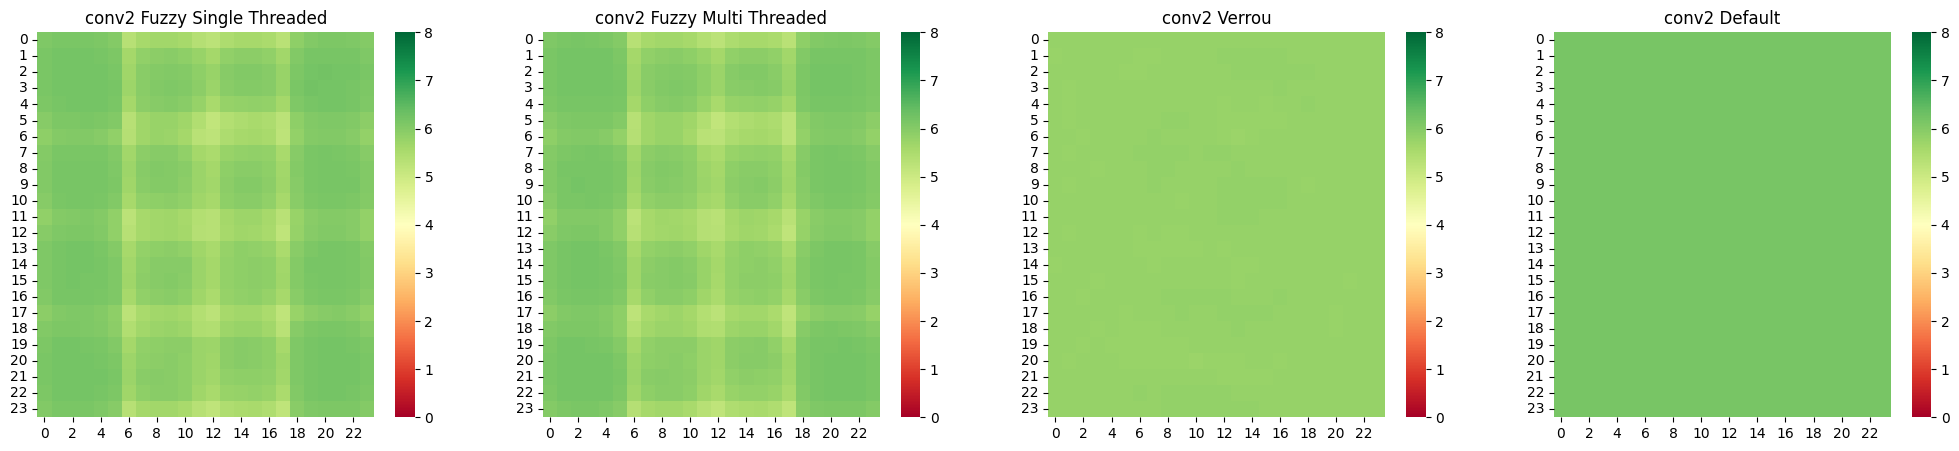

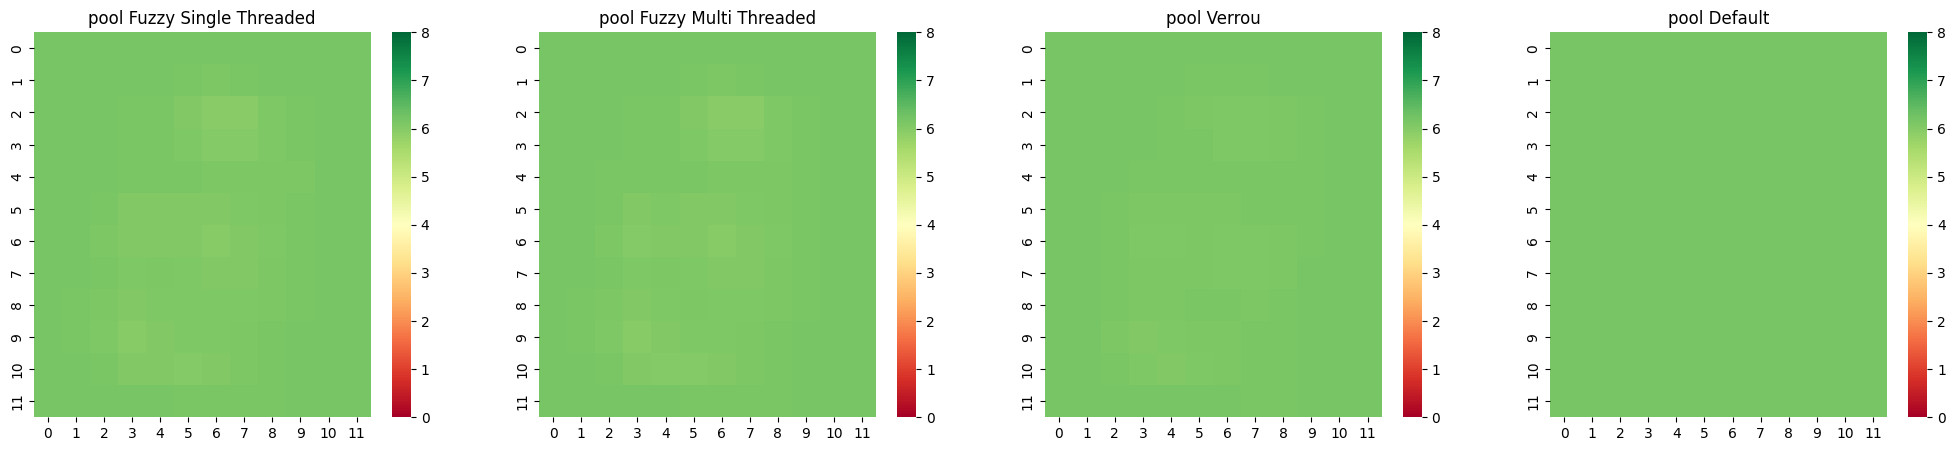

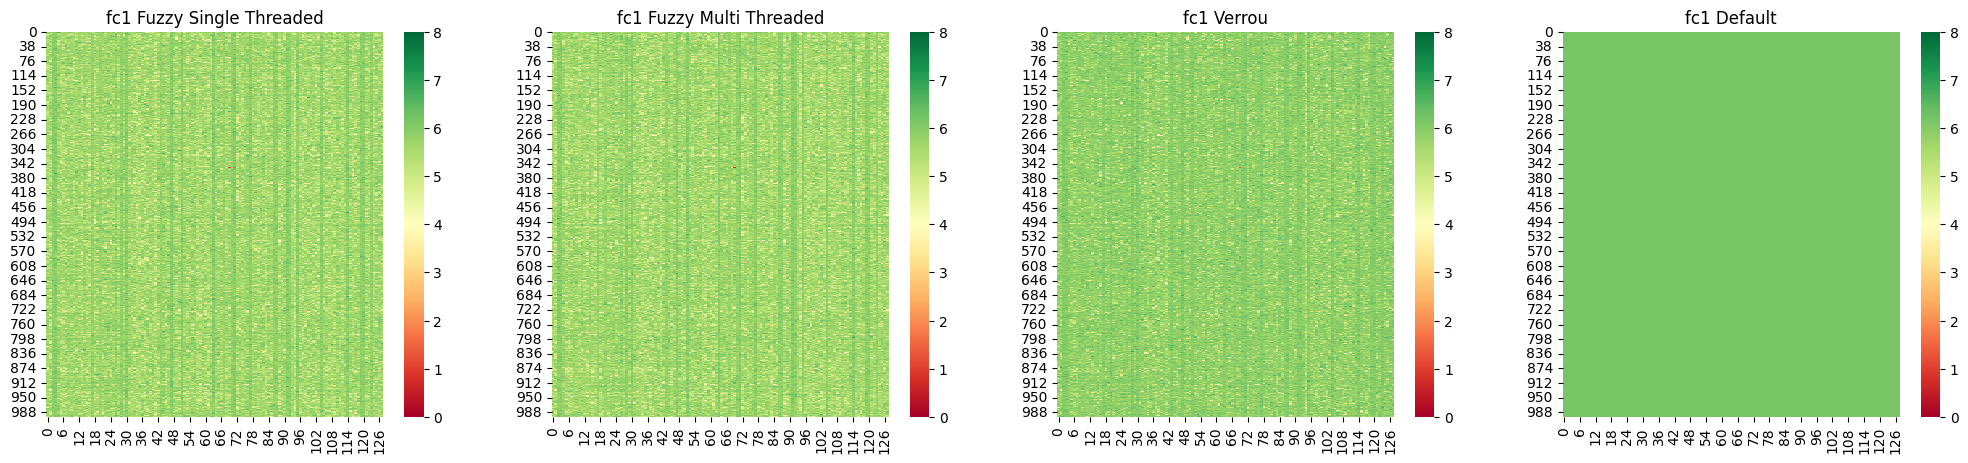

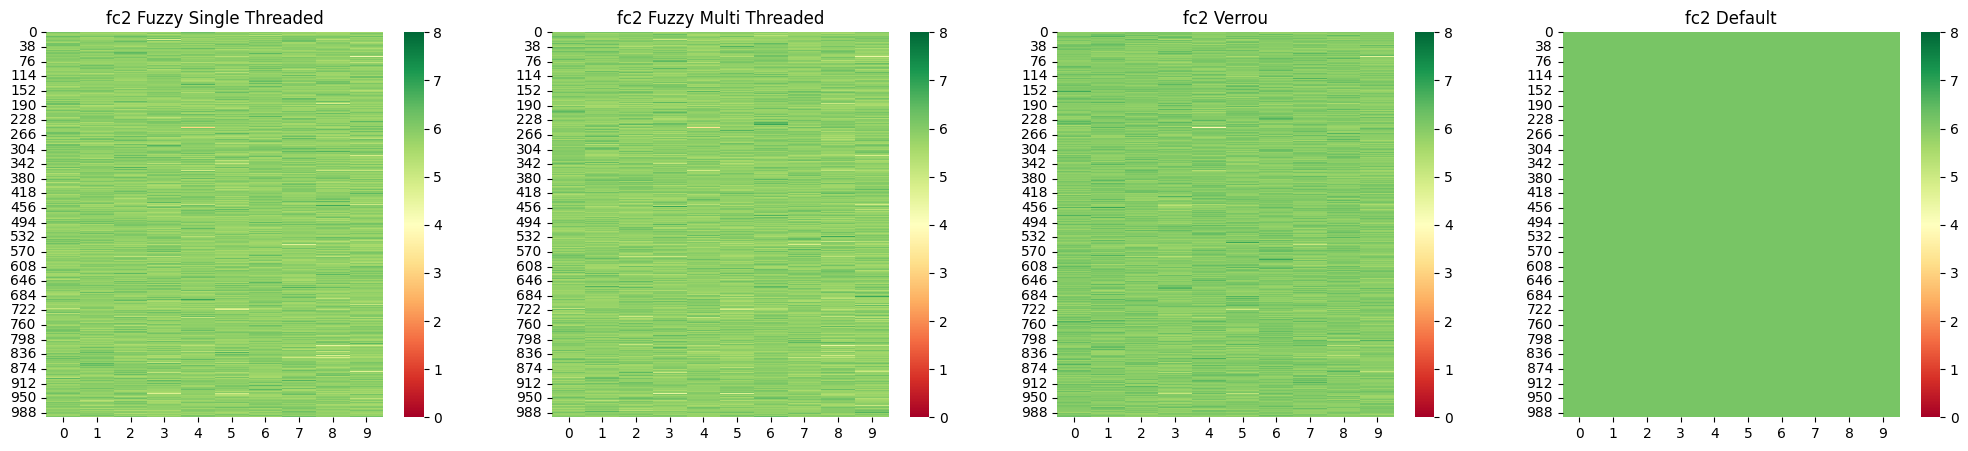

In [51]:

for layer in ['conv1', 'conv2', 'pool', 'fc1', 'fc2']:
# for layer in ['fc1', 'fc2']:
    embed_fuzzy_singlethread = []
    embed_fuzzy_multithread = []
    embed_verrou = []
    embed_default = []
    for i in range(1,6):
        embed_fuzzy_singlethread.append( pickle.load(open(f"/home/inesgp/mnist/embeddings/fuzzy_singlethread/{layer}_{i}.pkl", 'rb')) )
        embed_fuzzy_multithread.append( pickle.load(open(f"/home/inesgp/mnist/embeddings/fuzzy_multi/{layer}_{i}.pkl", 'rb')) )
        embed_verrou.append( pickle.load(open(f"/home/inesgp/mnist/embeddings/verrou/{layer}_{i}.pkl", 'rb')) )
        embed_default.append( pickle.load(open(f"/home/inesgp/mnist/embeddings/default/{layer}_{i}.pkl", 'rb')) )
    embed_fuzzy_singlethread = torch.stack(embed_fuzzy_singlethread)
    embed_fuzzy_multithread = torch.stack(embed_fuzzy_multithread)
    embed_verrou = torch.stack(embed_verrou)
    embed_default = torch.stack(embed_default)

    fig, axes = plt.subplots(1,4, figsize=(25,5))

    if 'fc' in layer: 
        #fuzzy single threaded
        layer_sig = sd.significant_digits(embed_fuzzy_singlethread.type(dtype=torch.float32), reference=torch.mean(embed_fuzzy_singlethread, dim=0, dtype=torch.float32),  basis=10)
        sns.heatmap(layer_sig, ax=axes[0], cmap='RdYlGn', vmin=0, vmax=8)
        #fuzzy multithreaded
        layer_sig = sd.significant_digits(embed_fuzzy_multithread.type(dtype=torch.float32), reference=torch.mean(embed_fuzzy_multithread, dim=0, dtype=torch.float32),  basis=10)
        sns.heatmap(layer_sig, ax=axes[1], cmap='RdYlGn', vmin=0, vmax=8)
        #verrou
        layer_sig = sd.significant_digits(embed_verrou.type(dtype=torch.float32), reference=torch.mean(embed_verrou, dim=0, dtype=torch.float32),  basis=10)
        sns.heatmap(layer_sig, ax=axes[2], cmap='RdYlGn', vmin=0, vmax=8)
        #IEEE
        layer_sig = sd.significant_digits(embed_default.type(dtype=torch.float32), reference=torch.mean(embed_default, dim=0, dtype=torch.float32),  basis=10)
        sns.heatmap(layer_sig, ax=axes[3], cmap='RdYlGn', vmin=0, vmax=8)


    else:
        #fuzzy single threaded
        layer_sig = np.mean(sd.significant_digits(embed_fuzzy_singlethread.type(dtype=torch.float32), reference=torch.mean(embed_fuzzy_singlethread, dim=0, dtype=torch.float32),  basis=10), axis=0, dtype=np.float32)
        sns.heatmap(layer_sig[0], ax=axes[0], cmap='RdYlGn', vmin=0, vmax=8)
        #fuzzy multi threaded
        layer_sig = np.mean(sd.significant_digits(embed_fuzzy_multithread.type(dtype=torch.float32), reference=torch.mean(embed_fuzzy_multithread, dim=0, dtype=torch.float32),  basis=10), axis=0, dtype=np.float32)
        sns.heatmap(layer_sig[0], ax=axes[1], cmap='RdYlGn', vmin=0, vmax=8)
        #verrou
        layer_sig = np.mean(sd.significant_digits(embed_verrou.type(dtype=torch.float32), reference=torch.mean(embed_verrou, dim=0, dtype=torch.float32),  basis=10), axis=0, dtype=np.float32)
        sns.heatmap(layer_sig[0], ax=axes[2], cmap='RdYlGn', vmin=0, vmax=8)
        #IEEE
        layer_sig = np.mean(sd.significant_digits(embed_default.type(dtype=torch.float32), reference=torch.mean(embed_default, dim=0, dtype=torch.float32),  basis=10), axis=0, dtype=np.float32)
        sns.heatmap(layer_sig[0], ax=axes[3], cmap='RdYlGn', vmin=0, vmax=8)

    axes[0].set_title(f"{layer} Fuzzy Single Threaded")
    axes[1].set_title(f"{layer} Fuzzy Multi Threaded")
    axes[2].set_title(f"{layer} Verrou")
    axes[3].set_title(f"{layer} Default")
    

plt.show()

**Fuzzy Single Threaded with Stdev**

/home/inesgp/.local/lib/python3.11/site-packages/significantdigits/_significantdigits.py:257: RuntimeWarning: invalid value encountered in divide
  return operator(x, y_reshaped)


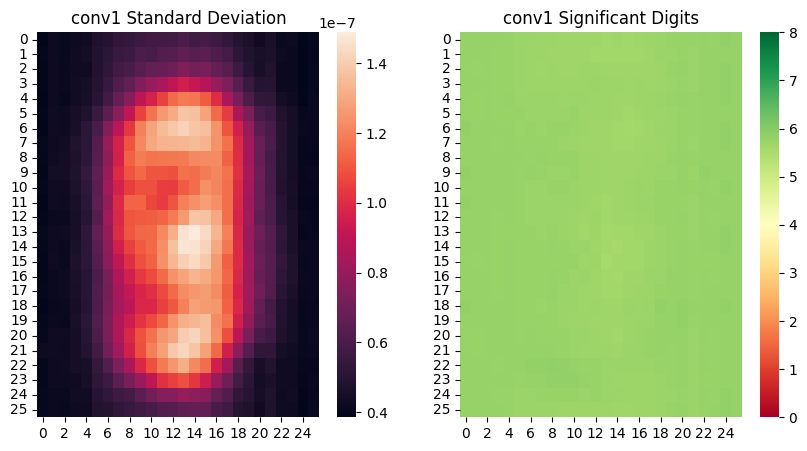

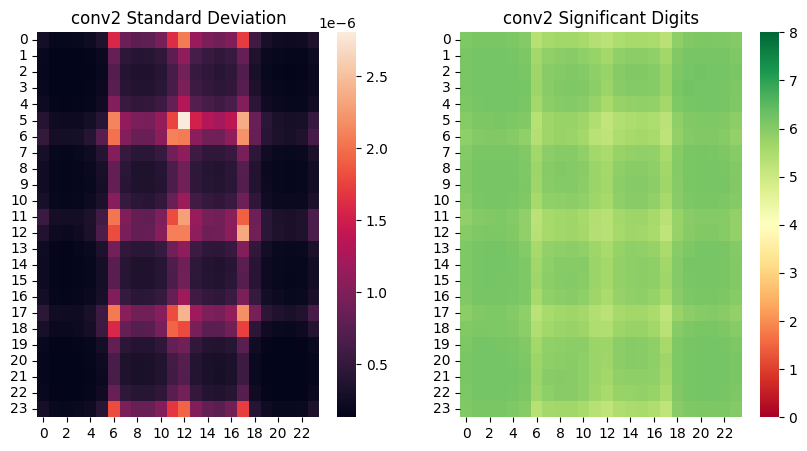

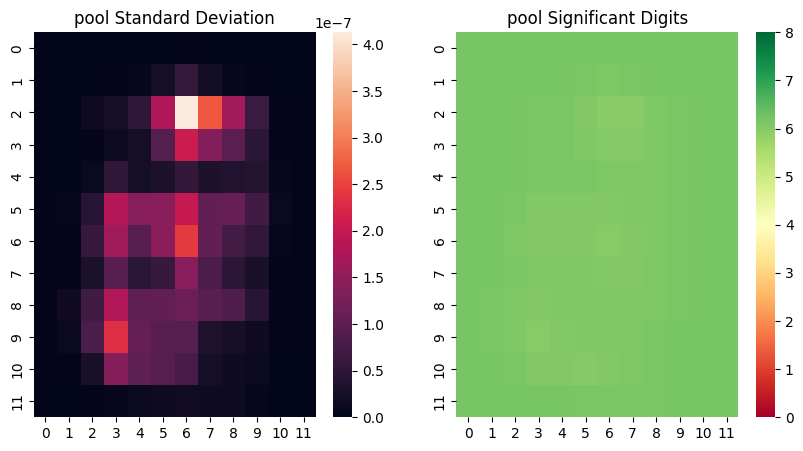

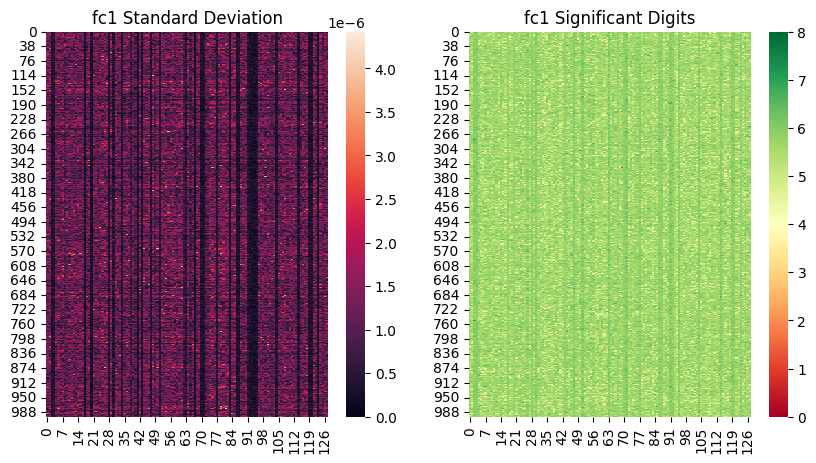

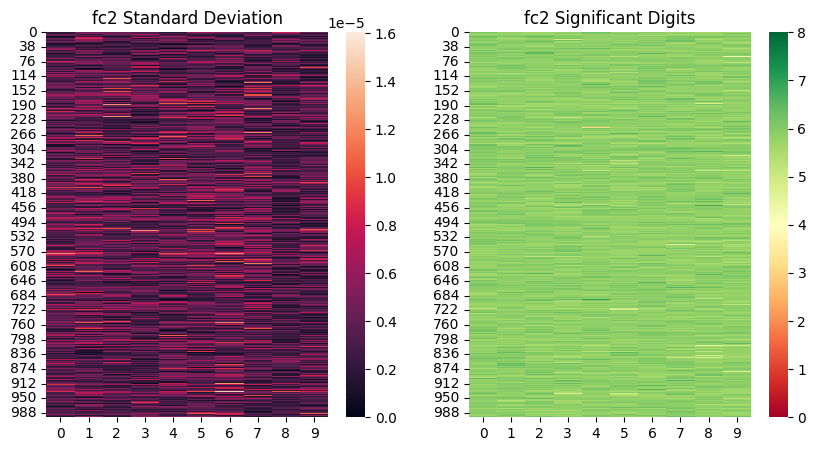

In [ ]:

for layer in ['conv1', 'conv2', 'pool', 'fc1', 'fc2']:
    embed = []
    for i in range(1,6):
        embed.append( pickle.load(open(f"/home/inesgp/mnist/embeddings/fuzzy_singlethread/{layer}_{i}.pkl", 'rb')) )
    embed = torch.stack(embed)

    fig, axes = plt.subplots(1,2, figsize=(10,5))

    if 'fc' in layer: 
        layer_std = torch.std(embed, dim=0)
        sns.heatmap(layer_std, ax=axes[0],)

        layer_sig = sd.significant_digits(embed.type(dtype=torch.float32), reference=torch.mean(embed, dim=0, dtype=torch.float32),  basis=10)
        sns.heatmap(layer_sig, ax=axes[1], cmap='RdYlGn', vmin=0, vmax=8)

    else:
        layer_std = torch.mean(torch.std(embed, dim=0), dim=0, dtype=torch.float32)
        sns.heatmap(layer_std[0], ax=axes[0],)
        
        layer_sig = np.mean(sd.significant_digits(embed.type(dtype=torch.float32), reference=torch.mean(embed, dim=0, dtype=torch.float32),  basis=10), axis=0)
        sns.heatmap(layer_sig[0], ax=axes[1], cmap='RdYlGn', vmin=0, vmax=8)

    axes[0].set_title(f"{layer} Standard Deviation")
    axes[1].set_title(f"{layer} Significant Digits")
    

plt.show()

### Additional Variability Checks

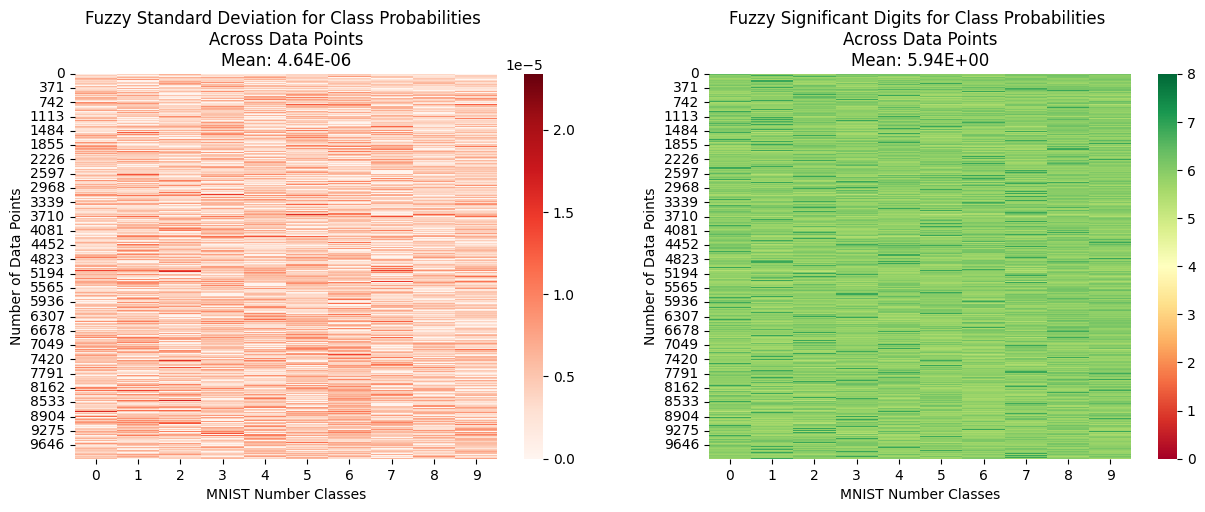

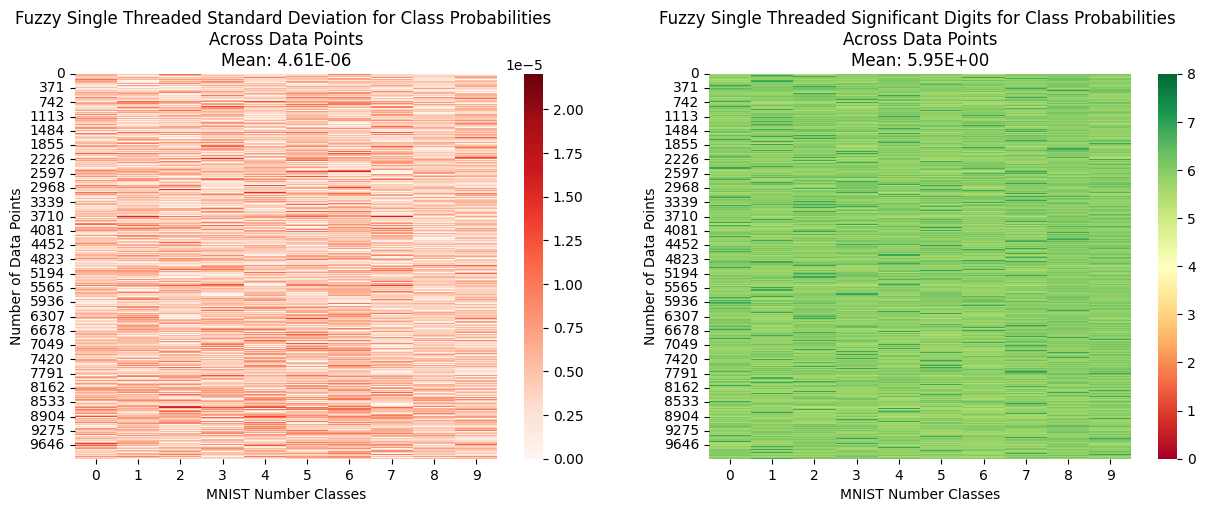

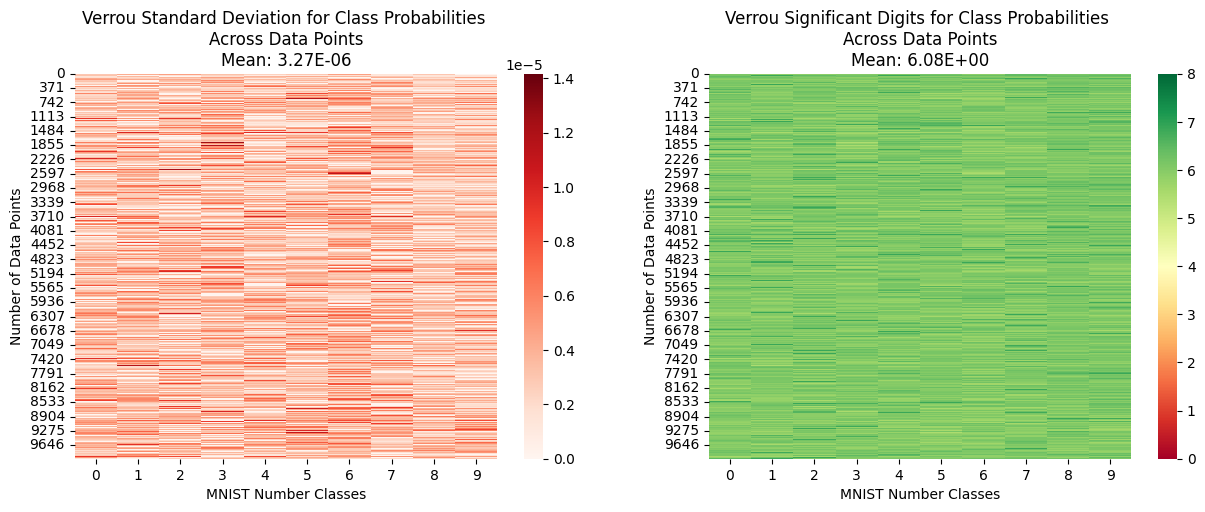

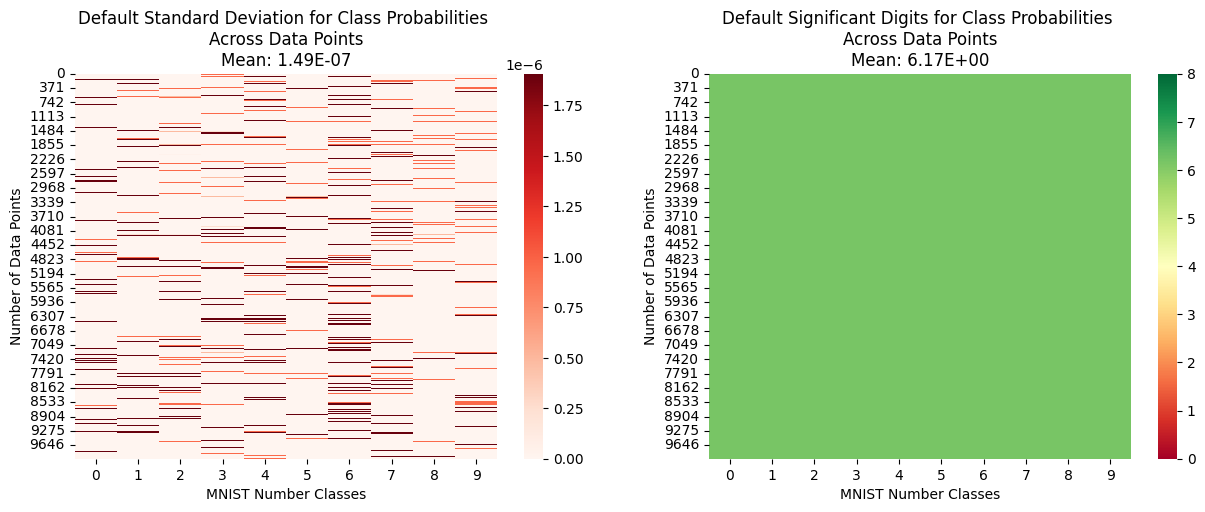

In [34]:
def visualize_class_prob(mca_type, output):
    fig, axes = plt.subplots(1,2, figsize=(15,5))
    class_prob_data = np.std(np.array(list(output.values())), axis=0)
    g = sns.heatmap(class_prob_data, cmap='Reds', ax=axes[0])
    g.set_title(f'{mca_type} Standard Deviation for Class Probabilities \nAcross Data Points\nMean: {np.mean(class_prob_data):.2E}')
    g.set_xlabel('MNIST Number Classes'), g.set_ylabel('Number of Data Points')

    class_prob_data_sig = sd.significant_digits(np.array(list(output.values()), dtype=np.float32), reference=np.mean(np.array(list(output.values()), dtype=np.float32)), basis=10)
    g = sns.heatmap(class_prob_data_sig, cmap='RdYlGn', ax=axes[1], vmin=0, vmax=8)
    g.set_title(f'{mca_type} Significant Digits for Class Probabilities \nAcross Data Points\nMean: {np.mean(class_prob_data_sig):.2E}')
    g.set_xlabel('MNIST Number Classes'), g.set_ylabel('Number of Data Points')

    
    # plt.figure()
    # # print(np.max(np.std(class_prob_data, axis=0)))
    # g = sns.heatmap(np.std(class_prob_data, axis=0).reshape(1,-1), cmap='Reds', ax=axes[2]) # vmin=0, vmax=2.0580248e-06)
    # g.set_yticks([]), g.set_xlabel('MNIST Number Classes')
    # g.set_title(f'{mca_type} Standard Deviation \nAcross Averaged Class Probabilities');

visualize_class_prob(mca_type='Fuzzy', output=fuzzy_output)
plt.show()
visualize_class_prob(mca_type='Fuzzy Single Threaded', output=fuzzy_singlethread_output)
plt.show()
visualize_class_prob(mca_type='Verrou', output=verrou_output)
plt.show()
visualize_class_prob(mca_type='Default', output=default_output)


In [18]:
class_prob_data = np.std(np.array(list(fuzzy_output.values())), axis=0)
# g = sns.heatmap(class_prob_data)
# g.set_title(f'{mca_type} Standard Deviation for Class Probabilities \nAcross Data Points\nMean: {np.mean(class_prob_data):.2E}')
# g.set_xlabel('MNIST Number Classes'), g.set_ylabel('Number of Data Points');

# plt.figure()
# g = sns.heatmap(np.std(class_prob_data, axis=0).reshape(1,-1))
# g.set_yticks([]), g.set_xlabel('MNIST Number Classes')
# g.set_title(f'{mca_type} Standard Deviation \nAcross Averaged Class Probabilities');

df = {}
for i in range(10):
    df[i] = [np.std(class_prob_data, axis=0)[i]]

df = pd.DataFrame(df)
df.index = ['MNIST Class Probabilities Standard Deviation']

df.T

,MNIST Class Probabilities Standard Deviation
0,0.000003
1,0.000003
2,0.000003
3,0.000003
4,0.000003
5,0.000002
6,0.000003
7,0.000003
8,0.000002
9,0.000002


In [ ]:
class_prob_data = np.std(np.array(list(fuzzy_singlethread_output.values())), axis=0)

df = {}
for i in range(10):
    df[i] = [np.std(class_prob_data, axis=0)[i]]

df = pd.DataFrame(df)
df.index = ['MNIST Class Probabilities Standard Deviation']

df.T

,MNIST Class Probabilities Standard Deviation
0,0.000003
1,0.000003
2,0.000003
3,0.000003
4,0.000003
5,0.000003
6,0.000003
7,0.000003
8,0.000002
9,0.000002


In [ ]:
class_prob_data = np.std(np.array(list(verrou_output.values())), axis=0)

df = {}
for i in range(10):
    df[i] = [np.std(class_prob_data, axis=0)[i]]

df = pd.DataFrame(df)
df.index = ['MNIST Class Probabilities Standard Deviation']

df.T

,MNIST Class Probabilities Standard Deviation
0,0.000002
1,0.000002
2,0.000002
3,0.000002
4,0.000002
5,0.000002
6,0.000002
7,0.000002
8,0.000001
9,0.000002


In [ ]:
class_prob_data = np.std(np.array(list(default_output.values())), axis=0)

df = {}
for i in range(10):
    df[i] = [np.std(class_prob_data, axis=0)[i]]

df = pd.DataFrame(df)
df.index = ['MNIST Class Probabilities Standard Deviation']

df.T

,MNIST Class Probabilities Standard Deviation
0,4.657275e-07
1,5.221520e-07
2,4.733344e-07
3,4.630091e-07
4,5.078733e-07
5,4.672007e-07
6,5.510598e-07
7,4.633133e-07
8,3.517193e-07
9,4.304954e-07


## FastSurfer Variability
**TO DO**
* Run 5 more subjects for 
    * fuzzy singlethread 
    * default
* Get dice scores
* Do entropy maps?

### Dice Scores
* Calculated using Freesurfer v7.3.1 [```mri_seg_overlap```](https://surfer.nmr.mgh.harvard.edu/fswiki/mri_overlap)

In [84]:
def dice_score_aggregator(file_dir):

    aggregated_data_min = {}
    for sub in ['0003002', '0025011', '0025248', '0025350', '0025531']:
        aggregated_data = {}
        aggregated_data_min[sub] = {}

        n=5
        for i in range(1, n + 1):
            for j in range(i, n + 1):
                if i == j: continue
                f = open(f"{file_dir}{sub}_{i}_{j}.json", 'r')
                data = json.load(f)

                # print(data['measures']['dice']['labels'])
                # print(data['names'])

                # Aggregate the values from data['measures']['dice']['labels']
                labels = data['measures']['dice']['labels']
                if labels:
                    for label, dice_scores in labels.items():
                        # If the label is not already in the aggregated_data, initialize it as an empty list
                        if label not in aggregated_data:
                            aggregated_data[label] = []

                        # Append the value to the list for this label
                        aggregated_data[label].append(dice_scores)

            df = pd.DataFrame(aggregated_data)
            df = df.rename(columns=data['names'])
            
            for col in df.columns:
                aggregated_data_min[sub][col] = [ df[col].min() ]


    dice_df = pd.DataFrame([])
    for sub in aggregated_data_min.keys():
        df = pd.DataFrame(aggregated_data_min[sub])
        dice_df = pd.concat([dice_df, df])
        dice_df = dice_df.rename(index={0:f"sub-{sub}"})

    dice_df['subjectID'] = dice_df.index
    dice_df = dice_df.reset_index(drop=True)

    return dice_df

fuzzy_dice_df = dice_score_aggregator(file_dir='/home/inesgp/verrou_fastsurfer/dice_scores/')
default_dice_df = dice_score_aggregator(file_dir='/home/inesgp/verrou_fastsurfer/dice_scores/ieee_')


In [85]:
default_dice_df

,Left-Thalamus,Left-Caudate,Left-Putamen,Left-Pallidum,3rd-Ventricle,4th-Ventricle,Brain-Stem,Left-Hippocampus,Left-Amygdala,Left-Cerebral-White-Matter,...,Right-Pallidum,Right-Hippocampus,Right-Amygdala,Right-Accumbens-area,Right-VentralDC,Right-choroid-plexus,Left-Cerebellum-White-Matter,WM-hypointensities,Left-Cerebellum-Cortex,subjectID
0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,sub-0003002
1,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,sub-0025011
2,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,sub-0025248
3,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,sub-0025350
4,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,sub-0025531


In [51]:
PROPS = {
        'boxprops':{'facecolor':'none', 'edgecolor':'black'},
        'medianprops':{'color':'black'},
        'whiskerprops':{'color':'black'},
        'capprops':{'color':'black'}
    }

# fuzzy_dice_df = pd.read_csv('/home/inesgp/verrou_fastsurfer/fuzzy_min_dice_scores.csv')
verrou_dice_df = pd.read_csv('/home/inesgp/verrou_fastsurfer/fast_min_dice_scores.csv')
mask = verrou_dice_df[['subjectID']].isin(fuzzy_dice_df[['subjectID']].to_dict(orient='list')).all(axis=1)

verrou_dice_df = verrou_dice_df[mask]
verrou_dice_df = verrou_dice_df.reset_index(drop=True)

cols = list(verrou_dice_df.columns)


/tmp/ipykernel_411598/50635272.py:19: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  g.set_yticklabels(cols, fontsize=35)
/tmp/ipykernel_411598/50635272.py:31: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  g2.set_xticklabels([f'{x:.1f}' for x in g2.get_xticks()], size = 30)
/tmp/ipykernel_411598/50635272.py:47: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  g3.set_xticklabels([f'{x:.1f}' for x in g2.get_xticks()], size = 30)


''

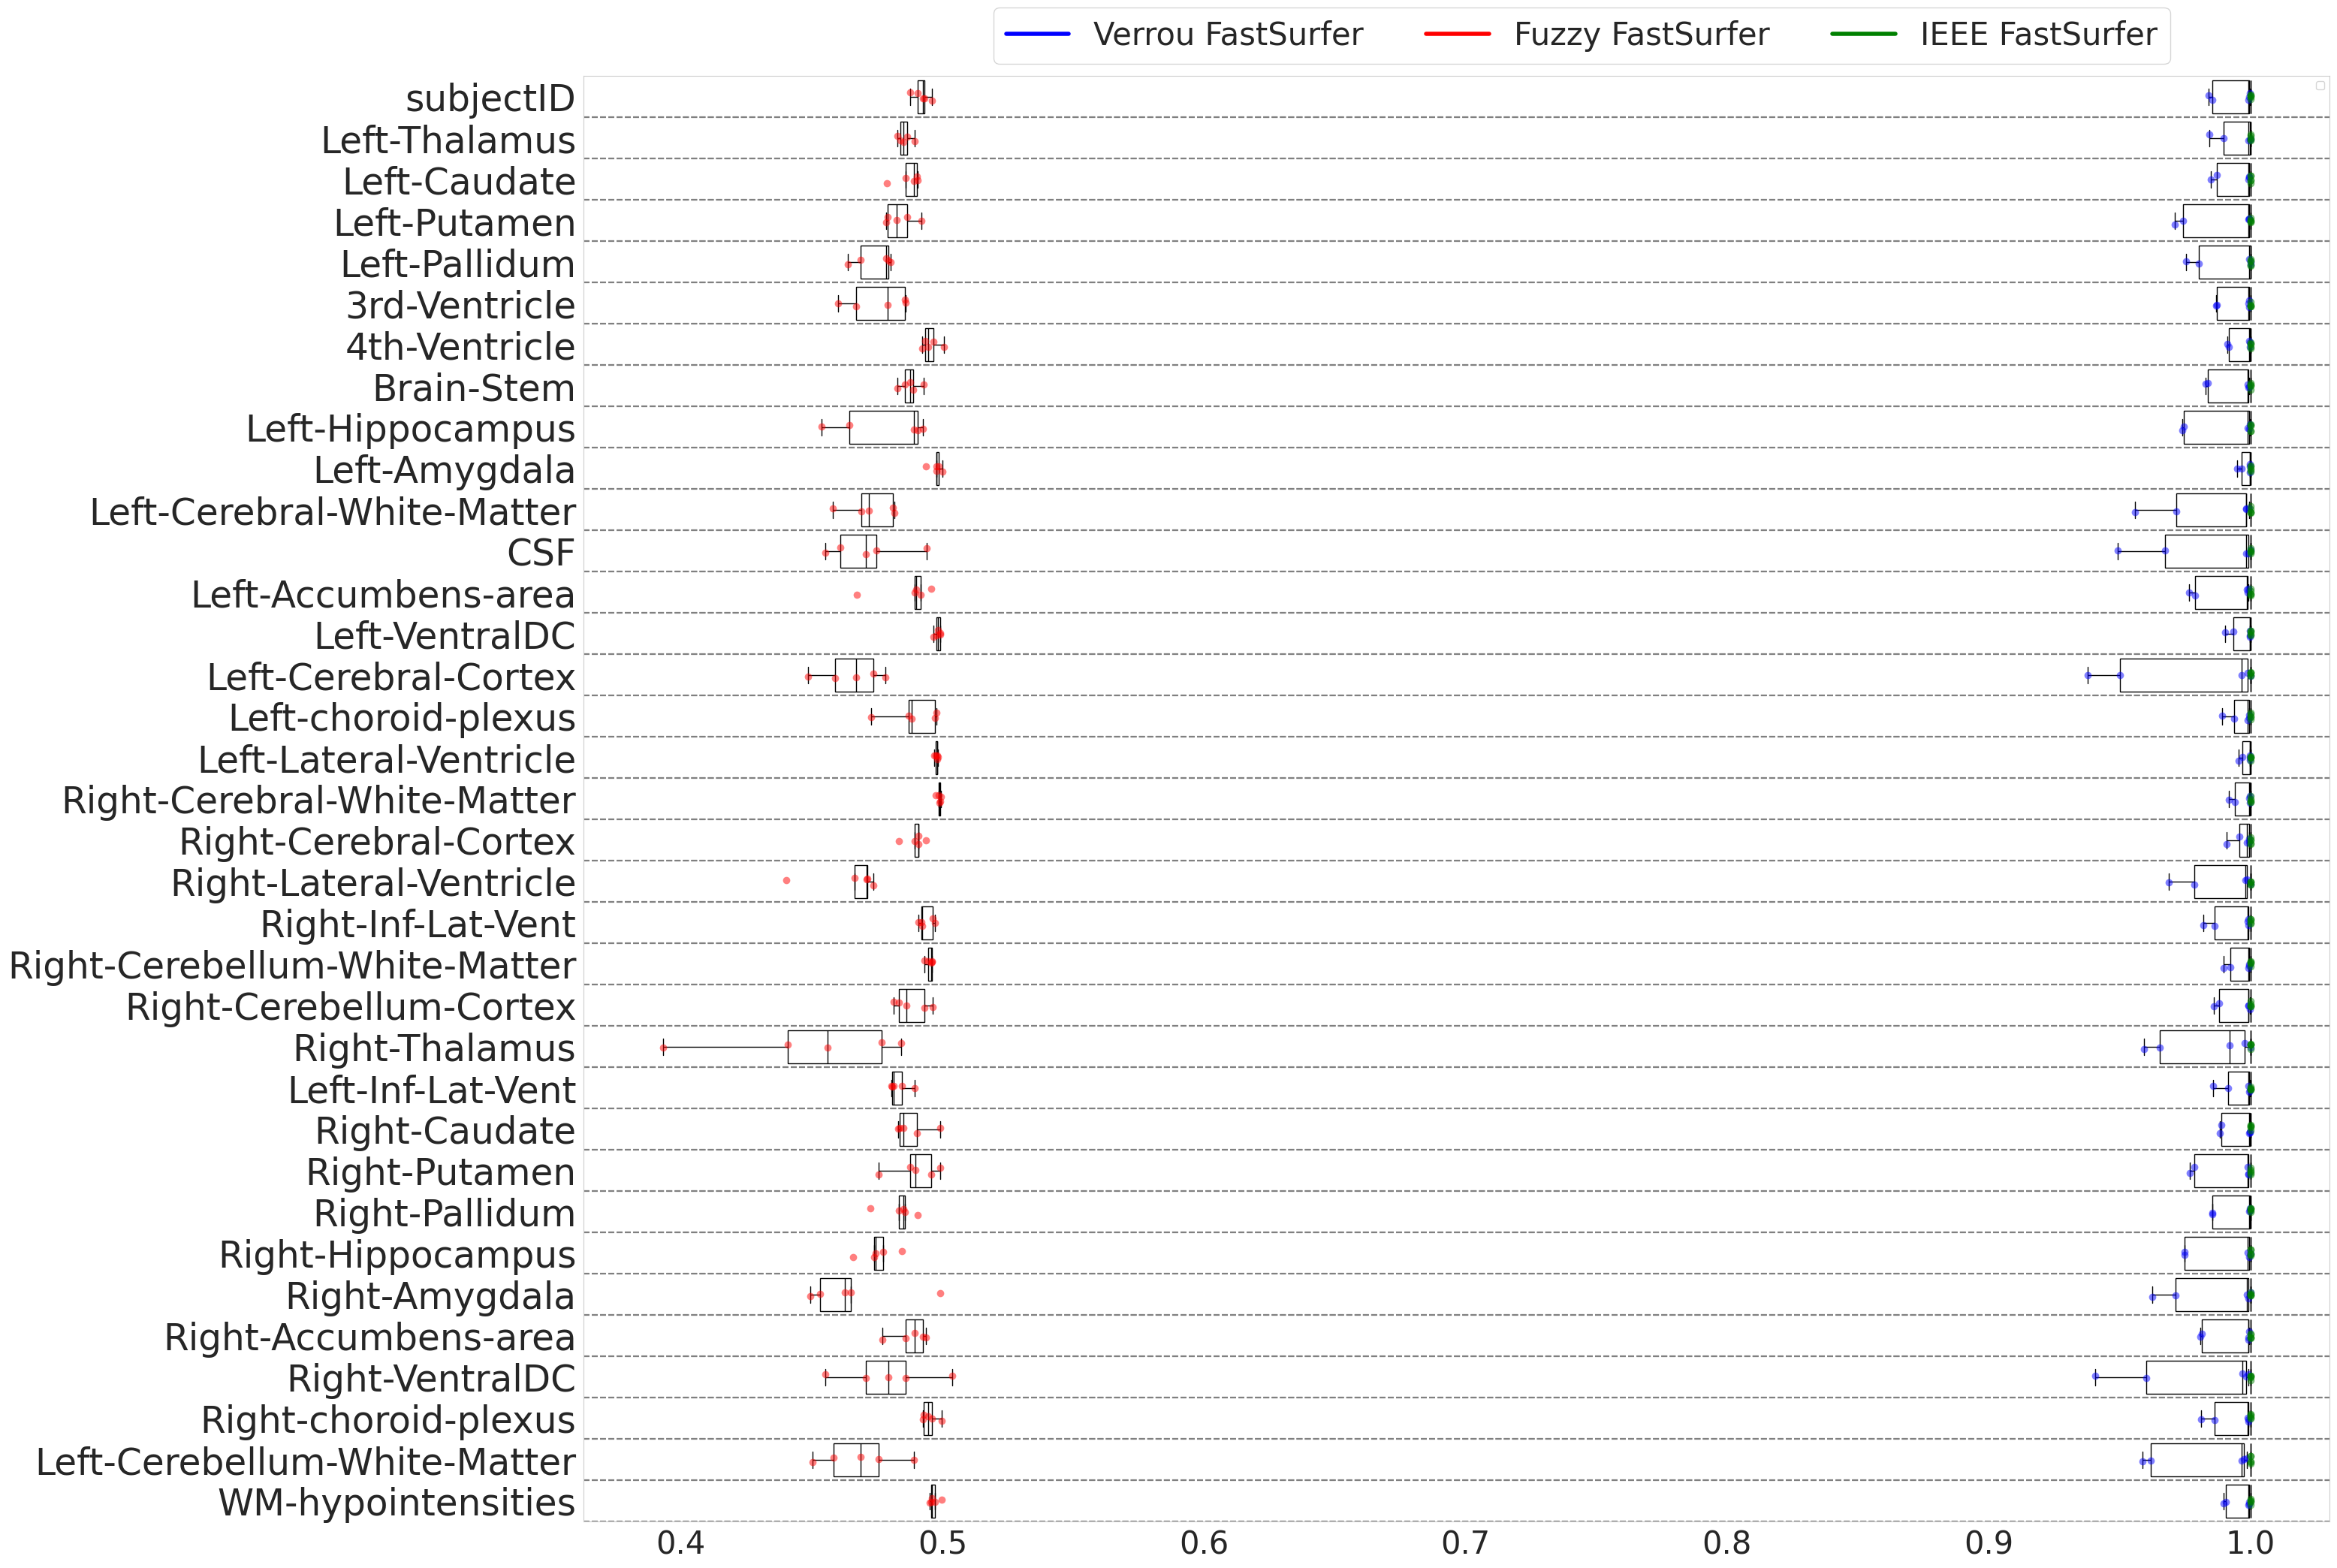

In [ ]:
#Verrou
sns.set_style("whitegrid", {'axes.grid' : False})

long_df = verrou_dice_df.melt(id_vars=['subjectID'], var_name='ROI', value_name='Sorensen Dice Scores')

fig, ax = plt.subplots(figsize=(30,25))


# g = sns.stripplot(data=long_df, y='ROI', x='Sorensen Dice Scores', hue='subjectID', color='blue', alpha=0.5, size=7)
g = sns.stripplot(data=long_df, y='ROI', x='Sorensen Dice Scores', label='Verrou', color='blue', alpha=0.5, size=7)
sns.boxplot(data=verrou_dice_df, orient='h', showfliers = False, **PROPS)

g.set(xlabel=None)
g.set(ylabel=None)
g.set_yticklabels(cols, fontsize=35)

handles, labels = g.get_legend_handles_labels()
plt.legend(handles[:0], labels[:0]) #Make sure incorrect legend is empty

#fuzzy
long_df = fuzzy_dice_df.melt(id_vars=['subjectID'], var_name='ROI', value_name='Sorensen Dice Scores')

# g2 = sns.stripplot(data=long_df, y='ROI', x='Sorensen Dice Scores', hue='subjectID', color='red', alpha=0.5, size=7)
g2 = sns.stripplot(data=long_df, y='ROI', x='Sorensen Dice Scores', label='Fuzzy', color='red', alpha=0.5, size=7)
sns.boxplot(data=fuzzy_dice_df, orient='h', showfliers = False, **PROPS)
g2.set_xticklabels([f'{x:.1f}' for x in g2.get_xticks()], size = 30)
g2.set(xlabel=None)
g2.set(ylabel=None)

handles2, labels2 = g2.get_legend_handles_labels()  
plt.legend(handles2[:0], labels2[:0]) #Make sure incorrect legend is empty

# Default
long_df = default_dice_df.melt(id_vars=['subjectID'], var_name='ROI', value_name='Sorensen Dice Scores')

# g3 = sns.stripplot(data=long_df, y='ROI', x='Sorensen Dice Scores', hue='subjectID', color='red', alpha=0.5, size=7)
g3 = sns.stripplot(data=long_df, y='ROI', x='Sorensen Dice Scores', label='Default', color='green', alpha=0.5, size=7)
sns.boxplot(data=default_dice_df, orient='h', showfliers = False, **PROPS)
g3.set_xticklabels([f'{x:.1f}' for x in g2.get_xticks()], size = 30)
g3.set(xlabel=None)
g3.set(ylabel=None)


handles3, labels3 = g3.get_legend_handles_labels()  
plt.legend(handles3[:0], labels3[:0]) #Make sure incorrect legend is empty


from matplotlib.lines import Line2D
custom_lines = [Line2D([0], [0], color='blue', lw=4),
                Line2D([0], [0], color='red', lw=4),
                Line2D([0], [0], color='green', lw=4)]

fig.legend(custom_lines, ['Verrou FastSurfer', 'Fuzzy FastSurfer', 'IEEE FastSurfer'], ncol=3, fontsize=30, bbox_to_anchor=(0.3, 0.925), loc='upper left');
for i in range(35):
    g.axhline(y = i+0.5,xmin = 0, xmax = 1, linestyle = "dashed", color ='grey') 
    g2.axhline(y = i+0.5,xmin = 0, xmax = 1, linestyle = "dashed", color ='grey') 
    g3.axhline(y = i+0.5,xmin = 0, xmax = 1, linestyle = "dashed", color ='grey') 

;